<p style="font-family: 'Brush Script MT', cursive font-size: 80px; text-align: center; ;">Health Care Data Analysis</p>


***Author: Muneeb Ahmad***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("healthcare_dataset.csv")

<p style="font-family: 'Brush Script MT',  font-size: 80px; text-align: center; ;">Sneak Preview of Data</p>


In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [5]:
#Check the shape of data
print(f'The Training Dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The Training Dataset has 55500 rows and 15 columns.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [7]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Milestone Achieved There is no Null Value in our Dataset

<p style=", cursive; font-size: 80px; text-align: center; color: white;">EDA</p>


We will need to change the format of Name Column in one Format like lowercase or uppercase because this format will not accepted

In [8]:
# Convert the 'Name' column to lowercase
df['Name'] = df['Name'].str.lower()

# Display the updated DataFrame
df.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,leslie terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,danny smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrew watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrienne bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [9]:
# Assuming df is your DataFrame and 'Date of Admission' and 'Discharge Date' are the column names
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])


# Now 'Date of Admission' and 'Discharge Date' columns are converted to datetime format


In [10]:
df.describe()

,Age,Date of Admission,Billing Amount,Room Number,Discharge Date
count,55500.000000,55500,55500.000000,55500.000000,55500
mean,51.539459,2021-11-01 01:02:22.443243008,25539.316097,301.134829,2021-11-16 13:15:20.821621504
min,13.000000,2019-05-08 00:00:00,-2008.492140,101.000000,2019-05-09 00:00:00
25%,35.000000,2020-07-28 00:00:00,13241.224652,202.000000,2020-08-12 00:00:00
50%,52.000000,2021-11-01 00:00:00,25538.069376,302.000000,2021-11-17 00:00:00
75%,68.000000,2023-02-03 00:00:00,37820.508436,401.000000,2023-02-18 00:00:00
max,89.000000,2024-05-07 00:00:00,52764.276736,500.000000,2024-06-06 00:00:00
std,19.602454,NaN,14211.454431,115.243069,NaN


In [11]:
df.describe(include= "object").T

,count,unique,top,freq
Name,55500,40235,michael williams,24
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Medication,55500,5,Lipitor,11140
Test Results,55500,3,Abnormal,18627


**Observations:**

1. **Patient Age Range:**
   - Patients' ages range from 13 to 89 years, with an average age of approximately 52 years.

2. **Hospital Room Capacity:**
   - The hospital offers a range of rooms, from 101 to 500, ensuring flexibility in patient accommodation.

3. **Temporal Coverage:**
   - Data spans from May 8, 2019, to May 7, 2024, providing a comprehensive five-year view of patient admissions.

4. **Admission Types:**
   - Patients enter the hospital through three main admission routes:
       - Emergency
       - Elective
       - Transfer

5. **Blood Type Distribution:**
   - Patients exhibit various blood types, with A- being the most prevalent.

6. **Hospital Distribution:**
   - The dataset encompasses admissions from 44 hospitals, with LLC Smith being the most frequent.

7. **Doctor Distribution:**
   - Among the 27 doctors recorded in the dataset, Michael Smith attends to the highest number of patients.

In [12]:
# Categorical columns
df['Gender'].value_counts()

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [13]:
print(df['Blood Type'].value_counts())

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64


In [14]:
print(df['Admission Type'].value_counts())


Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


In [15]:
print(df['Insurance Provider'].value_counts())

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


In [16]:
print(df['Doctor'].value_counts().sum())

55500


In [17]:
# Test results analysis
print(df['Test Results'].value_counts())


Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64


In [18]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

<p style=" cursive; font-size: 80px; text-align: center; color: white;">Visualizations</p>


In [19]:
# Plot histogram for the 'Age' column
fig = px.histogram(df, x='Age', title='Age Distribution', nbins=30)
fig.show()


In [20]:

# Define object-type columns
object_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Insurance Provider', "Medication", 'Test Results']

# Define pastel color palette
pastel_palette = px.colors.qualitative.Pastel

# Plotly plots for object-type columns
for col in object_columns:
    fig = go.Figure()
    for i, (category, count) in enumerate(df[col].value_counts().items()):
        fig.add_trace(go.Bar(x=[col], y=[count], name=category, marker_color=pastel_palette[i]))
    fig.update_layout(title=f'Distribution of {col}', xaxis_title=col, yaxis_title='Count')
    fig.show()


In [ ]:
# grafico para analisar a correlação das variaveis
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True)

In [21]:
# Group 'Age' by 'Medical Condition' and calculate the mean age for each condition
age_by_condition = df.groupby('Medical Condition')['Age'].mean().reset_index()

# Plot using Plotly Express with different color palettes
fig = px.bar(age_by_condition, x='Medical Condition', y='Age', color='Medical Condition',
             title='Average Age by Medical Condition',
             labels={'Age': 'Average Age', 'Medical Condition': 'Medical Condition'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()


In [22]:
# Group by 'Medical Condition' and 'Medication' and calculate the count for each combination
grouped_df = df.groupby(['Medical Condition', 'Medication']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Medical Condition', y='Count', color='Medication', barmode='group',
             title='Medication Distribution by Medical Condition',
             labels={'Count': 'Count', 'Medical Condition': 'Medical Condition', 'Medication': 'Medication'})
fig.show()


In [23]:
# Group 'Sex' by 'Medical Condition' and calculate the count for each combination
sex_by_condition = df.groupby(['Medical Condition', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express with different color palettes
fig = px.bar(sex_by_condition, x='Medical Condition', y='Count', color='Gender',
             title='Patient Count by Gender and Medical Condition',
             labels={'Count': 'Patient Count', 'Medical Condition': 'Medical Condition', 'Gender': 'Gender'},
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()


In [24]:
# Group by 'Blood Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Blood Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Blood Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Medical Condition': 'Medical Condition'})
fig.show()


In [25]:
# Group by 'Blood Type' and 'Gender' and calculate the count for each combination
grouped_df = df.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Blood Type', y='Count', color='Gender', barmode='group',
             title='Patient Count by Blood Type and Gender',
             labels={'Count': 'Patient Count', 'Blood Type': 'Blood Type', 'Gender': 'Gender'})
fig.show()


In [26]:
# Group by 'Admission Type' and 'Gender' and calculate the count for each combination
grouped_df = df.groupby(['Admission Type', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Gender', barmode='group',
             title='Patient Count by Admission Type and Gender',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Gender': 'Gender'})
fig.show()


In [27]:
# Group by 'Admission Type' and 'Medical Condition' and calculate the count for each combination
grouped_df = df.groupby(['Admission Type', 'Medical Condition']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Admission Type', y='Count', color='Medical Condition', barmode='group',
             title='Patient Count by Admission Type and Medical Condition',
             labels={'Count': 'Patient Count', 'Admission Type': 'Admission Type', 'Medical Condition': 'Medical Condition'})
fig.show()


In [28]:
# Group by 'Test Results' and 'Admission Type' and calculate the count for each combination
grouped_df = df.groupby(['Test Results', 'Admission Type']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Test Results', y='Count', color='Admission Type', barmode='group',
             title='Test Results Distribution by Admission Type',
             labels={'Count': 'Count', 'Test Results': 'Test Results', 'Admission Type': 'Admission Type'})
fig.show()


In [29]:
# Group by 'Medication' and 'Gender' and calculate the count for each combination
grouped_df = df.groupby(['Medication', 'Gender']).size().reset_index(name='Count')

# Plot using Plotly Express
fig = px.bar(grouped_df, x='Medication', y='Count', color='Gender', barmode='group',
             title='Medication Distribution by Gender',
             labels={'Count': 'Count', 'Medication': 'Medication', 'Gender': 'Gender'})
fig.show()


### ***Some Questions from Data***

1. **What is the most common blood type among the patients?**


In [30]:
most_common_blood_type = df['Blood Type'].value_counts().idxmax()
print(f"The most common blood type among the patients is {most_common_blood_type}.")


The most common blood type among the patients is A-.


2. **How many unique hospitals are included in the dataset?**


In [31]:
unique_hospitals = df['Hospital'].nunique()
print(f"There are {unique_hospitals} unique hospitals included in the dataset.")


There are 39876 unique hospitals included in the dataset.


3. **Who is the oldest patient in the dataset, and what is their age?**


In [32]:
oldest_patient_age = df['Age'].max()
oldest_patient_name = df[df['Age'] == oldest_patient_age]['Name'].iloc[0]
print(f"The oldest patient in the dataset is {oldest_patient_name} with an age of {oldest_patient_age} years.")


The oldest patient in the dataset is david newton with an age of 89 years.


4. **Which doctor has treated the highest number of patients?**


In [33]:
doctor_highest_patient_count = df['Doctor'].value_counts().idxmax()
print(f"The doctor who has treated the highest number of patients is {doctor_highest_patient_count}.")


The doctor who has treated the highest number of patients is Michael Smith.


5. **What is the most frequently prescribed medication?**


In [34]:
most_frequent_medication = df['Medication'].value_counts().idxmax()
print(f"The most frequently prescribed medication is {most_frequent_medication}.")


The most frequently prescribed medication is Lipitor.


6. **Are there any seasonal trends in hospital admissions?**


In [35]:
# Calculate monthly admissions
monthly_admissions = df['Date of Admission'].dt.month.value_counts().sort_index()

# Create a DataFrame
monthly_admissions_df = pd.DataFrame({'Month': monthly_admissions.index, 'Admissions': monthly_admissions.values})

# Plot the trend using Plotly Express
fig = px.line(monthly_admissions_df, x='Month', y='Admissions', title='Monthly Admissions Trend')
fig.update_xaxes(title='Month')
fig.update_yaxes(title='Number of Admissions')
fig.show()


7. **What is the average billing amount for patients?**


In [36]:
average_billing_amount = df['Billing Amount'].mean()
print(f"The average billing amount for patients is ${average_billing_amount:.2f}.")


The average billing amount for patients is $25539.32.


8. **How many male and female patients are there?**


In [37]:
male_patients = df[df['Gender'] == 'Male'].shape[0]
female_patients = df[df['Gender'] == 'Female'].shape[0]
print(f"There are {male_patients} Male patients and {female_patients} Female patients.")


There are 27774 Male patients and 27726 Female patients.


9. **What are the top three most common medical conditions for which patients are admitted?**


In [38]:
top_three_medical_conditions = df['Medical Condition'].value_counts().head(3)
print("Top Three Most Common Medical Conditions:")
print("----------------------------------------")
print(top_three_medical_conditions)


Top Three Most Common Medical Conditions:
----------------------------------------
Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Name: count, dtype: int64


In [43]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC                         
from sklearn.naive_bayes import GaussianNB         
from sklearn.tree import DecisionTreeClassifier                           
from sklearn.ensemble import RandomForestClassifier 

from sklearn.preprocessing import LabelEncoder, OneHotEncoder #Label Encoder/One Hot Encoder
from sklearn.metrics import confusion_matrix #Confusion Matrix

In [39]:
def identify_columns(dataframe):
    numeric_features = [feature for feature in dataframe.columns if dataframe[feature].dtype != 'O']
    categorical_features = [feature for feature in dataframe.columns if dataframe[feature].dtype == 'O']
    print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
    print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

identify_columns(df)

We have 5 numerical features: ['Age', 'Date of Admission', 'Billing Amount', 'Room Number', 'Discharge Date']
We have 10 categorical features: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


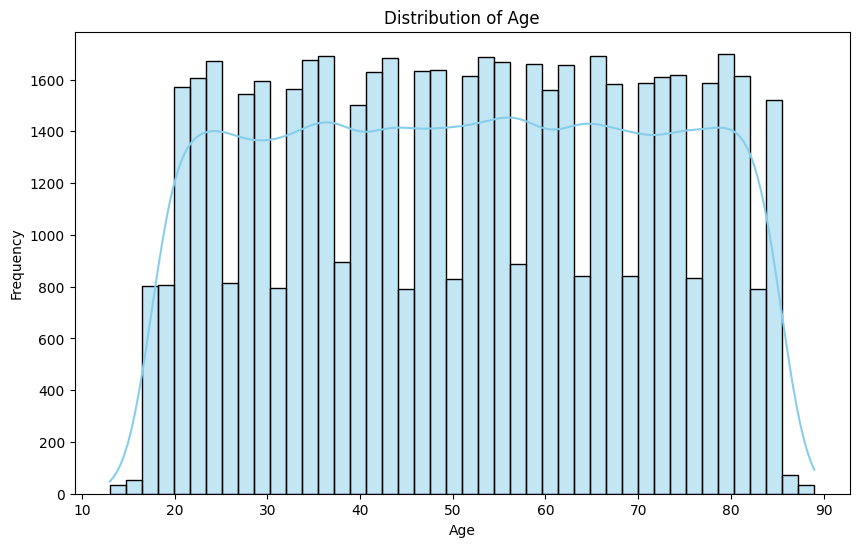

In [40]:
# Display the distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

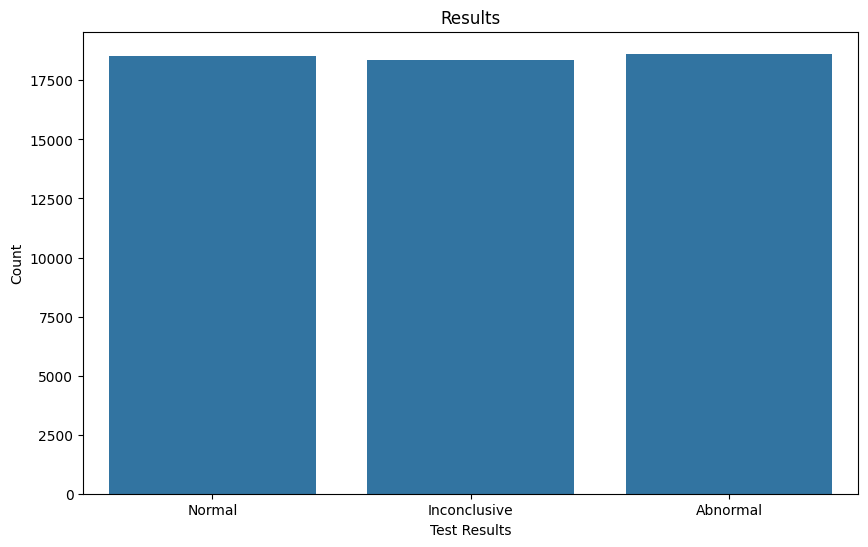

In [41]:
# Analyzing categories count
plt.figure(figsize=(10, 6))
sns.countplot(df, x="Test Results")
plt.title('Results')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.show()

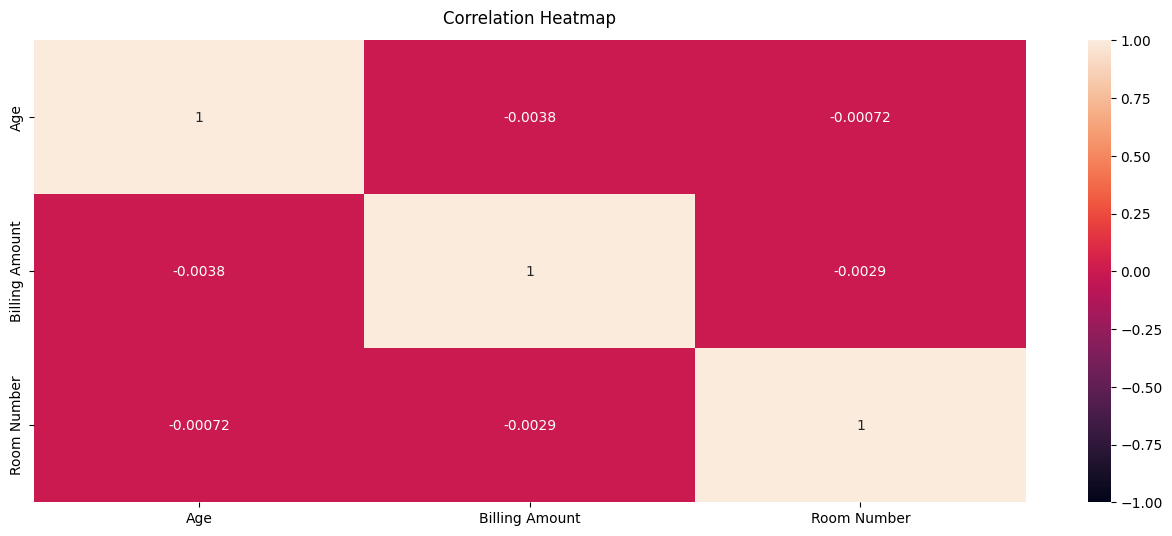

In [42]:
numeric_data = df.drop(columns = ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']) 
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [44]:
#Label Encoding
def encode_features(dataframe):
    le = LabelEncoder()
    for col in ['Gender', 'Test Results']:
        if col in dataframe.columns:
            dataframe[col] = le.fit_transform(dataframe[col])
    
    return dataframe

df = encode_features(df)
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,bobby jackson,30,1,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,2
1,leslie terry,62,1,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,1
2,danny smith,76,0,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,2
3,andrew watts,28,0,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,0
4,adrienne bell,43,0,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,elizabeth jackson,42,0,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,0
55496,kyle perez,61,0,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,2
55497,heather wang,38,0,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,0
55498,jennifer jones,43,1,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,0


In [45]:
#One Hot Encoding
def apply_one_hot_encoding(dataframe):
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    categorical_cols = ['Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Insurance Provider']
    dataframe =pd.concat([
    dataframe.drop(categorical_cols, axis=1),
    pd.DataFrame(encoder.fit_transform(dataframe[categorical_cols]), columns=encoder.get_feature_names_out())], axis=1)
    return dataframe

df = apply_one_hot_encoding(df)


In [46]:
df

,Name,Age,Gender,Date of Admission,Doctor,Hospital,Billing Amount,Room Number,Discharge Date,Test Results,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
0,bobby jackson,30,1,2024-01-31,Matthew Smith,Sons and Miller,18856.281306,328,2024-02-02,2,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,leslie terry,62,1,2019-08-20,Samantha Davies,Kim Inc,33643.327287,265,2019-08-26,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,danny smith,76,0,2022-09-22,Tiffany Mitchell,Cook PLC,27955.096079,205,2022-10-07,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,andrew watts,28,0,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",37909.782410,450,2020-12-18,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,adrienne bell,43,0,2022-09-19,Kathleen Hanna,White-White,14238.317814,458,2022-10-09,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,elizabeth jackson,42,0,2020-08-16,Joshua Jarvis,Jones-Thompson,2650.714952,417,2020-09-15,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
55496,kyle perez,61,0,2020-01-23,Taylor Sullivan,Tucker-Moyer,31457.797307,316,2020-02-01,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
55497,heather wang,38,0,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",27620.764717,347,2020-08-10,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55498,jennifer jones,43,1,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",32451.092358,321,2019-05-31,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [47]:
#Dropping Date of Admission, Name, Doctor, Hospital, Discharge Date
df = df.drop(columns = ['Date of Admission', 'Name', 'Doctor', 'Hospital', 'Discharge Date'])
df

,Age,Gender,Billing Amount,Room Number,Test Results,Blood Type_A+,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,...,Medication_Aspirin,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin,Insurance Provider_Aetna,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare
0,30,1,18856.281306,328,2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,62,1,33643.327287,265,1,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,76,0,27955.096079,205,2,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,28,0,37909.782410,450,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,43,0,14238.317814,458,0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,0,2650.714952,417,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
55496,61,0,31457.797307,316,2,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
55497,38,0,27620.764717,347,0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55498,43,1,32451.092358,321,0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
#Creating X and y data
X = df.drop(columns = 'Test Results') 
y = df['Test Results'] #Target value

#Splitting the Data using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)
#model = RandomForestClassifier(max_depth = 15, random_state = 5)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
y_pred = model.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test,y_pred))

Test Accuracy: 0.3687687687687688


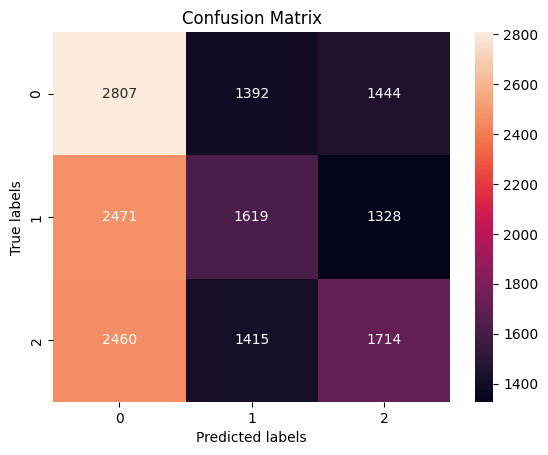

In [51]:
# Modify the confusion matrix visualizationdefplot_confusion_matrix(y_test,y_pred):
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
#plt.xticks(ticks=[0.5, 1.5], labels=['', '',''])
#plt.yticks(ticks=[0.5, 1.5], labels=['', '',''])
plt.show()

In [52]:
def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    print("Test Accuracy:",accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))

evaluate_model(model,X_test,y_test)

Test Accuracy: 0.3687687687687688
              precision    recall  f1-score   support

           0       0.36      0.50      0.42      5643
           1       0.37      0.30      0.33      5418
           2       0.38      0.31      0.34      5589

    accuracy                           0.37     16650
   macro avg       0.37      0.37      0.36     16650
weighted avg       0.37      0.37      0.36     16650

